In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [ ]:
dados=load_breast_cancer()
x=pd.DataFrame(dados.data,columns=[dados.feature_names])
y=pd.Series(dados.target)
x.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.value_counts()

1    357
0    212
dtype: int64

In [ ]:
dados.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
x_treino,x_teste,y_treino,y_teste= train_test_split(x,y,test_size=0.3)

In [ ]:
modelo=LogisticRegression(C=95,penalty='l1',solver='liblinear')

In [ ]:
modelo.fit(x_treino,y_treino)

LogisticRegression(C=95, penalty='l1', solver='liblinear')

In [ ]:
acuracia=modelo.score(x_teste,y_teste)

In [ ]:
acuracia

0.9649122807017544

In [ ]:
predicao=modelo.predict(x_teste)

In [ ]:
predicao[1:10]

array([1, 1, 1, 0, 1, 0, 1, 1, 0])

In [ ]:
y_teste[1:10]

173    1
286    1
204    1
389    0
241    1
15     0
350    1
249    1
121    0
dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_teste,predicao)

In [ ]:
matriz

array([[ 64,   4],
       [  2, 101]])

In [ ]:
prob=modelo.predict_proba(x_teste)

In [ ]:
prob

array([[3.10594172e-06, 9.99996894e-01],
       [3.51726426e-10, 1.00000000e+00],
       [2.25995157e-04, 9.99774005e-01],
       [3.78754115e-01, 6.21245885e-01],
       [9.99998586e-01, 1.41425589e-06],
       [6.91334882e-08, 9.99999931e-01],
       [9.99999992e-01, 7.51345341e-09],
       [3.09301995e-05, 9.99969070e-01],
       [1.40372220e-05, 9.99985963e-01],
       [1.00000000e+00, 1.61452811e-11],
       [3.56549126e-05, 9.99964345e-01],
       [3.35460829e-03, 9.96645392e-01],
       [1.00000000e+00, 1.01785980e-24],
       [1.29378521e-07, 9.99999871e-01],
       [4.21033008e-04, 9.99578967e-01],
       [1.00000000e+00, 2.87442200e-20],
       [1.00000000e+00, 3.06748558e-14],
       [4.01302689e-01, 5.98697311e-01],
       [4.02822975e-09, 9.99999996e-01],
       [6.65876255e-07, 9.99999334e-01],
       [1.00000000e+00, 6.25363802e-39],
       [2.01628747e-08, 9.99999980e-01],
       [8.98215895e-01, 1.01784105e-01],
       [1.28376315e-01, 8.71623685e-01],
       [2.020342

In [ ]:
from sklearn.metrics import roc_curve
prob2=prob[:,1]
FPR,TPR,th=roc_curve(y_teste,prob2)

0.9934323243860651


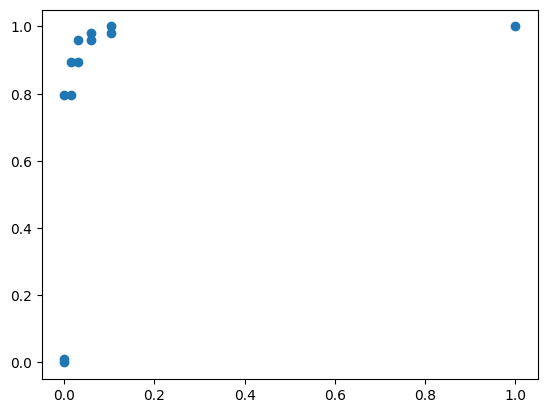

In [ ]:
plt.scatter(FPR,TPR)
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_teste,prob2)
print(auc)